# Andreev Mikhail HW #3

## EX. 1 

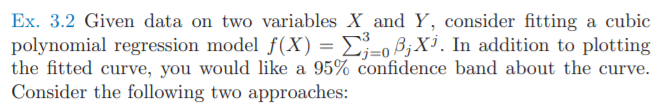

### №3.2
1)
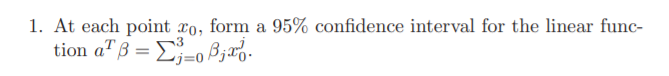
 
In the first place we have N by 4 data matrix with each row of the form $\mathbf{x} = (x^0_i, x^1_i, x^2_i, x^3_i)$ where i stands for the row number.

And the estimators $\hat \beta$ are got by the least square method.
The Variance of $\hat y$ is $$Var(x_i\cdot \hat \beta) = x_i\cdot Var(\hat \beta)\cdot x_i = \sigma^2 x_i(\mathbf{X}^T \mathbf{X})^{-1}x_i$$ Therefore for the $y$ confidence interval of 95% will be as follows:

$x_i\cdot \hat \beta \pm 1.96 \cdot \sqrt{Var(x_i\cdot \hat \beta)} = x_i\cdot \hat \beta \pm 1.96 \cdot \sqrt{\sigma^2 x_i(\mathbf{X}^T \mathbf{X})^{-1}x_i}$



2)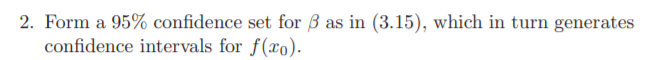


From the equation 3.15 
$$ C_{\beta} = \{\beta|(\hat \beta - \beta)^T (\mathbf{X}^T \mathbf{X})(\hat \beta - \beta) \leq {\hat \sigma^2} \cdot {\chi^2_{p+1}}^{(1-a)}\}$$

We know that ${\chi^2_{p+1}}^{(1-a)}$is a chi-squared distribution with the $p+1$ degrees of freedom and $1-a$ percentile. <br>
In our case $\alpha = 0.05$ and therefore from the table $\chi^2 = 3.84$
$$ C_{\beta} = \{\beta|(\hat \beta - \beta)^T (\mathbf{X}^T \mathbf{X})(\hat \beta - \beta) \leq {\hat \sigma^2} \cdot 3.84\}$$

From here we can obtain $C_{x^T \hat \beta}$ easily. It will be.
$$C_{x^T \hat \beta} = \{x^T \hat \beta| \beta \in C_{\beta}\}$$

I was not able to create my own simmulation experiment, but found one in the internet.


AUTHORTS: PengjuYan
https://github.com/PengjuYan

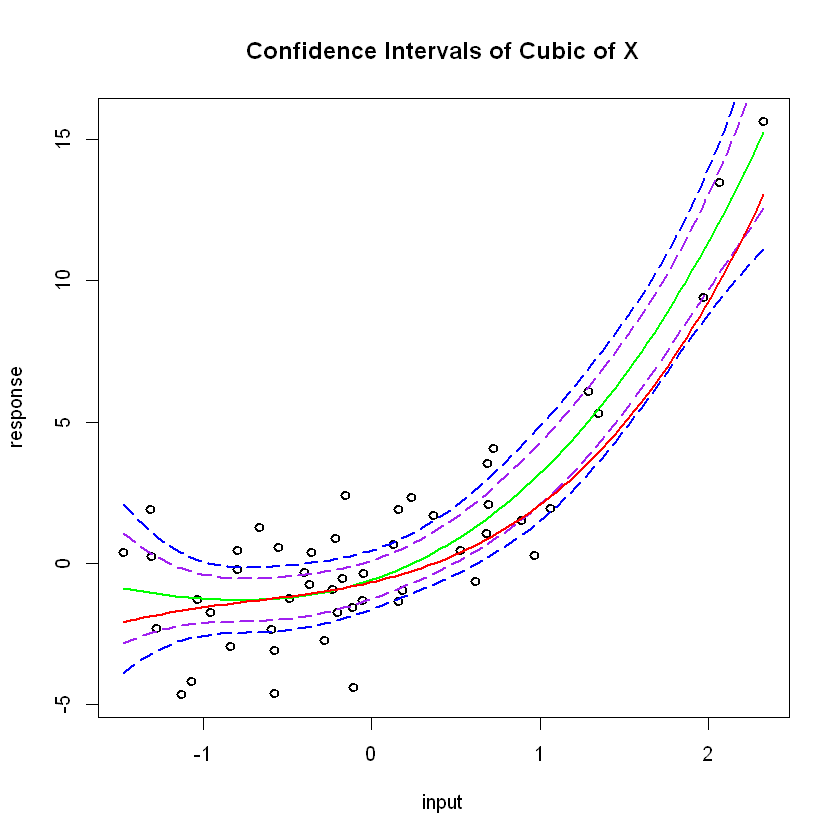

In [9]:
set.seed(4)
# ------------------------------------------------------------
# training data generation
# ------------------------------------------------------------
training.size <- 50
df <- training.size - 4
CalcFeatures <- function(x1) {
  x2 <- x1 ^ 2
  x3 <- x1 ^ 3
  cbind(x0=rep(1, length(x1)), x1=x1, x2=x2, x3=x3)
}
error <- rnorm(training.size, sd=2)
beta <- c(rnorm(1), rnorm(1, mean=2), rnorm(1, mean=1), rnorm(1, mean=0))
x <- CalcFeatures(rnorm(training.size))
y <- x %*% beta + error
train.data <- data.frame(x)
train.data$y = y
plot(train.data$x1, train.data$y, main='Confidence Intervals of Cubic of X',
     xlab='input', ylab='response', lwd=2, cex=1)
# ------------------------------------------------------------
# model fitting
# ------------------------------------------------------------
lm.fit <- lm(y ~ x1+x2+x3, data=train.data)
beta.hat <- coef(lm.fit)
x.range <- seq(min(train.data$x1), max(train.data$x1), length.out=100)
test.x <- CalcFeatures(x.range)
prediction.y <- predict(lm.fit, as.data.frame(test.x), interval='confidence')
fitted.values <- as.data.frame(prediction.y)
# ------------------------------------------------------------
# confidence bands calculation
# ------------------------------------------------------------
test.data <- data.frame(test.x)
sigma.hat <- sqrt(sum(lm.fit$residuals^2) / df)
sample.cov <- t(x) %*% x
inv.sample.cov <- solve(sample.cov)
t.quantile <- qt(0.975, df)
chi.quantile <- qchisq(0.95, 4)
bands <- apply(test.data, 1, function(x) {
  fitted <- x %*% beta.hat
  factor <- sqrt(t(x) %*% inv.sample.cov %*% x) * sigma.hat
  linear.band <- factor * t.quantile
  beta.set.band <- factor * sqrt(chi.quantile)
  c(fitted=fitted, linear.band=linear.band, beta.set.band=beta.set.band)
})
bands <- as.data.frame(t(bands))
AssertEqual <- function(expected, actual) {
  stopifnot(abs(expected - actual) < 1e-7)
}
AssertEqual(fitted.values$fit, bands$fitted)
AssertEqual(fitted.values$upr - fitted.values$fit, bands$linear.band)
# ------------------------------------------------------------
# boundary beta curves
# ------------------------------------------------------------
svd.decomposed <- svd(sample.cov)
d.sqrt <- matrix(0, ncol=4, nrow=4)
for (i in 1:4) {
  d.sqrt[i, i] <- sqrt(svd.decomposed$d[i])
}
a.matrix <- d.sqrt %*% t(svd.decomposed$v)
inv.a.matrix <- solve(a.matrix)
length.bound <- sigma.hat * sqrt(chi.quantile)
SampleBoundaryBeta <- function() {
  direction <- rnorm(4)
  circle.point <- direction / sqrt(sum(direction^2)) * length.bound
  inv.a.matrix %*% circle.point + beta.hat
}
# DrawBoundaryBeta <- function(beta) {
#   lines(test.data$x1, test.x %*% beta,
#         col='darkgray', lty='dotted', lwd=1)
# }
# for (i in 1:100) {
#   beta.sampled <- SampleBoundaryBeta()
#   DrawBoundaryBeta(beta.sampled)
# }
# ------------------------------------------------------------
# draw other more important curves
# ------------------------------------------------------------
lines(test.data$x1, bands$fitted - bands$beta.set.band,
      col='blue', lty='longdash', lwd=2)
lines(test.data$x1, bands$fitted + bands$beta.set.band,
      col='blue', lty='longdash', lwd=2)
lines(test.data$x1, fitted.values$lwr,
      col='purple', lty='longdash', lwd=2)
lines(test.data$x1, fitted.values$upr,
      col='purple', lty='longdash', lwd=2)
lines(test.data$x1, fitted.values$fit,
      col='green', lty='solid', lwd=2)
lines(test.data$x1, test.x %*% beta,
      col='red', lty='solid', lwd=2)

We can see that the seocond confidence interval is wider, on the level of intuition I would say that there are some $\beta$ that do not fall into the $C_\beta$ but  still affect the $x^T\beta$ in a way that brings them closer to the $x^T\hat \beta$, However in the second approach we only operate with $\beta$ that are in $C_\beta$

## EX. 2
### №3.5
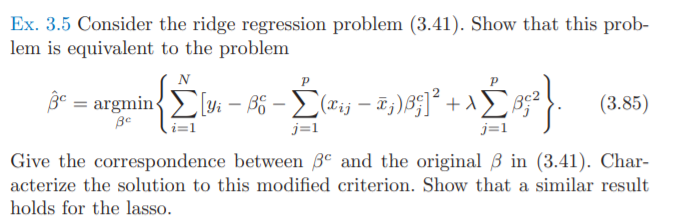

Recall the 3.41
$$\hat\beta^{ridge} = argmin_\beta\{\sum^N_{i=1}(y_i - \beta_0 - \sum^p_{j=1}x_{ij}\beta_j)^2 + \lambda \sum^p_{j=1} \beta^2_j \}$$


We can do proceed with the simple extraction of the sum in the RSS and see the difference of the betas

$$\sum^p_{j=1}(x_{i j}- \overline x_j)\beta^c_j = \sum^p_{j=1}x_{ij}\beta^c_j - \sum^p_{j=1}\overline x_j \beta_j^c$$


$$ RSS^c = \sum_{i=1}^N\left[y_i-\beta_0^c-\sum_{j=1}^p\left(x_{ij}-\bar{x}_j\right)\beta_j^c\right]^2 + \lambda\sum_{j=1}^p{\beta_j^c}^2 = \sum_{i=1}^N\left[y_i-\left(\beta_0^c-\sum_{j=1}^p\bar{x}_j\beta_j^c\right)-\sum_{j=1}^px_{ij}\beta_j^c\right]^2 + \lambda\sum_{j=1}^p{\beta_j^c}^2 $$

after that step we construct the correspondance system:

$$
\begin{equation}
\left\{
\begin{aligned}
\beta_j &= \beta_j^c, & 1 \le j \le p \\
\beta_0 &= \beta_0^c-\sum_{j=1}^p\bar{x}_j\beta_j^c,
\end{aligned}
\right.
\end{equation}
$$

In order to characterise the solution we are proceeding with the least squares method and find approximation for $\beta^c$

$$\frac{\partial{RSS^c}}{\partial{\beta_0^c}} = 2\sum_{i=1}^N\left[\beta_0^c-y_i+\sum_{j=1}^p\left(x_{ij}-\bar{x}_j\right)\beta_j^c\right] = 2N\beta_0^c - 2\sum_{i=1}^Ny_i + 2\sum_{i=1}^N\sum_{j=1}^p\left(x_{ij}-\bar{x}_j\right)\beta_j^c = 2N\beta_0^c - 2\sum_{i=1}^Ny_i + 2\sum_{j=1}^p\beta_j^c\sum_{i=1}^N\left(x_{ij}-\bar{x}_j\right) = 2N\beta_0^c - 2\sum_{i=1}^Ny_i + 2\sum_{j=1}^p\beta_j^c\times0 = 2N\beta_0^c - 2\sum_{i=1}^Ny_i
$$

Then by equating the result to zero we get approximation of $\hat \beta^c_0 = \frac{1}{N}\sum^N_{i=1}y_i = \overline y$


Exactly the same procedure can be conducted with Lasso regularisation with minor difference, $\beta^{c2}_j$ is replaced by $|\beta^c_j| $